<a href="https://colab.research.google.com/github/Shadi-Aldbaiss/Data-Preprocessing/blob/main/DataPreprocessing_Bankloan_Cleanedv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read dataset**

In [ ]:
# Import the dataset
# Try reading the CSV with a different encoding, such as 'latin-1'
try:
    df = pd.read_csv('/content/Bankloan_Cleanedv1.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed. Trying latin-1 encoding...")
    df = pd.read_csv('/content/Bankloan_Cleanedv1.csv', encoding='latin-1')

# **Discovering dataset**

In [ ]:
df.head()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,41.0,17,12,176.0,9.3,11.359392,5.008608,3.0,1
1,27.0,10,6,31.0,17.3,1.362202,4.000798,1.0,0
2,40.0,15,7,NaN,5.5,0.856075,2.168925,1.0,0
3,41.0,15,14,120.0,2.9,2.658720,0.821280,NaN,0
4,24.0,2,0,28.0,17.3,1.787436,3.056564,2.0,1


In [ ]:
df.tail()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
695,36.0,6,15,27.0,4.6,0.262062,0.979938,2.0,1
696,29.0,6,4,21.0,11.5,0.369495,2.045505,2.0,0
697,33.0,15,3,32.0,7.6,0.491264,1.940736,1.0,0
698,45.0,19,22,77.0,8.4,2.302608,4.165392,1.0,0
699,37.0,12,14,NaN,14.7,2.994684,3.473316,1.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       680 non-null    float64
 1   employ    700 non-null    int64  
 2   address   700 non-null    int64  
 3   income    663 non-null    float64
 4   debtinc   700 non-null    float64
 5   creddebt  700 non-null    float64
 6   othdebt   700 non-null    float64
 7   ed        680 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 49.3 KB


In [ ]:
df.shape

(700, 9)

In [ ]:
df.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
count,680.000000,700.000000,700.000000,663.00000,700.000000,700.000000,700.000000,680.000000,700.000000
mean,34.750000,8.388571,8.268571,45.74359,10.260571,1.553553,3.058209,1.717647,0.261429
std,7.973215,6.658039,6.821609,37.44108,6.827234,2.117197,3.287555,0.925652,0.439727
min,20.000000,0.000000,0.000000,14.00000,0.400000,0.011696,0.045584,1.000000,0.000000
25%,28.000000,3.000000,3.000000,24.00000,5.000000,0.369059,1.044178,1.000000,0.000000
50%,34.000000,7.000000,7.000000,34.00000,8.600000,0.854869,1.987567,1.000000,0.000000
75%,40.000000,12.000000,12.000000,54.50000,14.125000,1.901955,3.923065,2.000000,1.000000
max,56.000000,31.000000,34.000000,446.00000,41.300000,20.561310,27.033600,5.000000,1.000000


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
age,20
employ,0
address,0
income,37
debtinc,0
creddebt,0
othdebt,0
ed,20
default,0


In [ ]:
# List all categorical columns and their unique values
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# **Handle Missing Values**

In [ ]:

# Fill missing values with mean
df_copy=df.copy()
df_copy['age'] = df_copy['age'].fillna(df_copy['age'].mean())
df_copy['income'] = df_copy['income'].fillna(df_copy['income'].mean())
df_copy['ed'] = df_copy['ed'].fillna(df_copy['ed'].mean())
print(df_copy.isnull().sum())


age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64


# **EDA**

## **UNIVARIATE ANALYSIS**

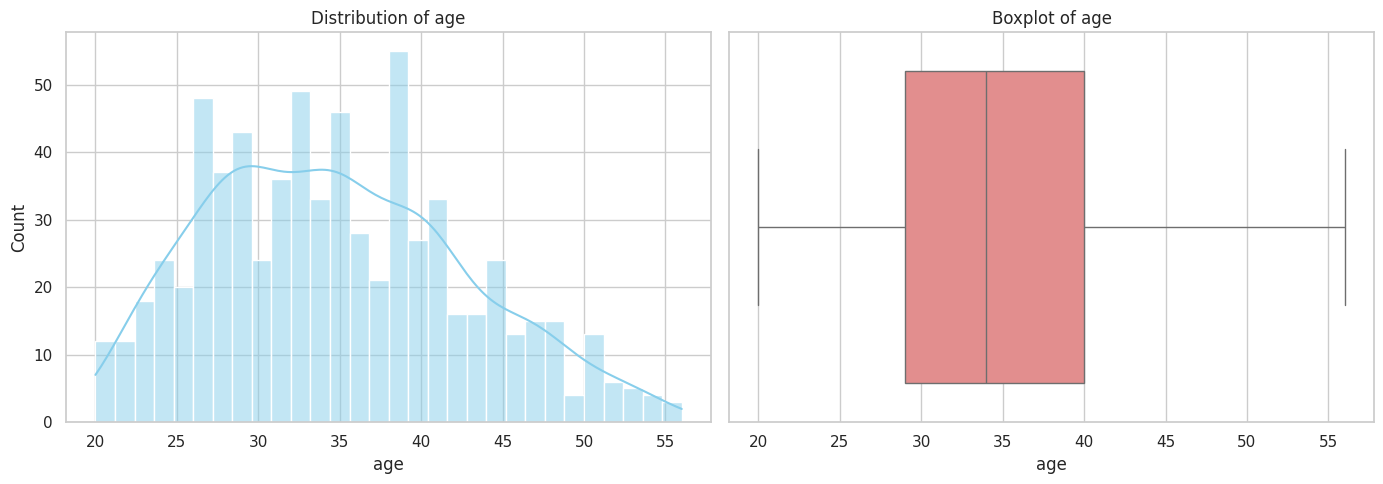

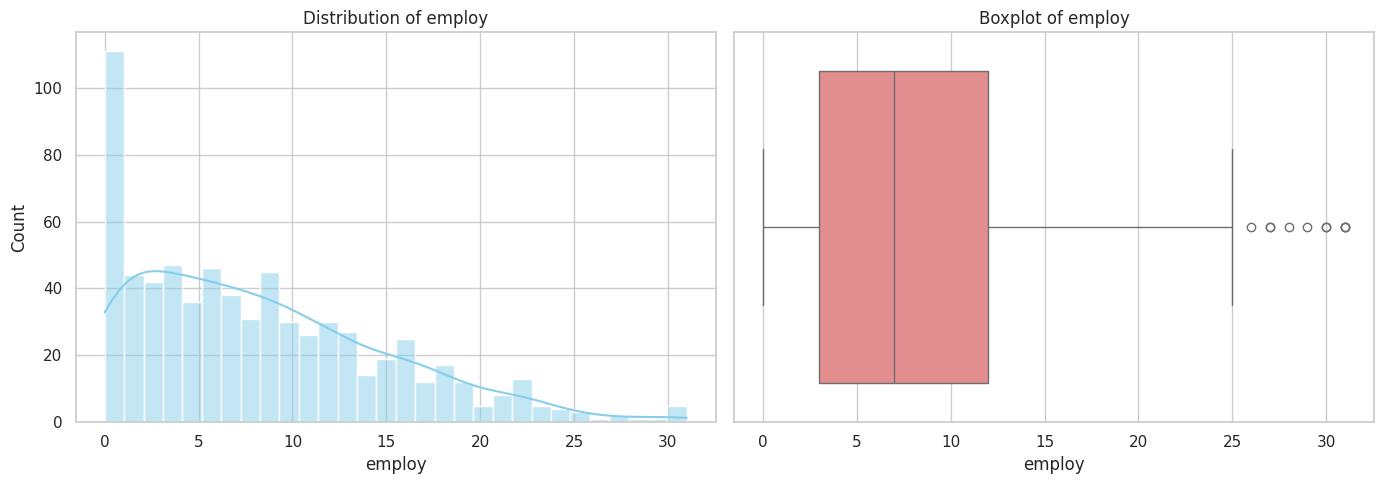

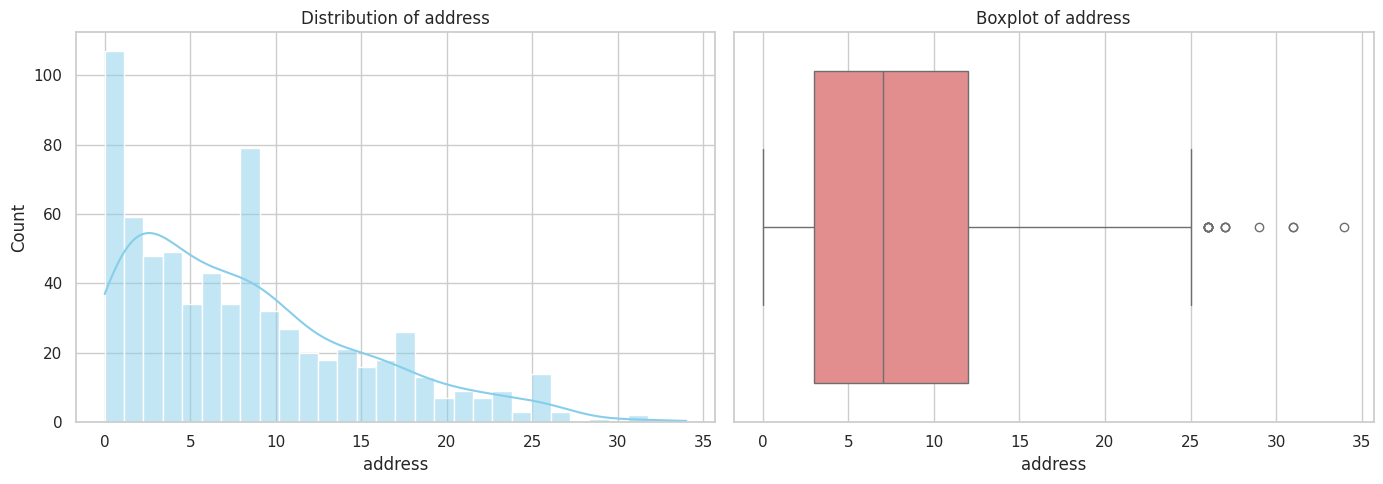

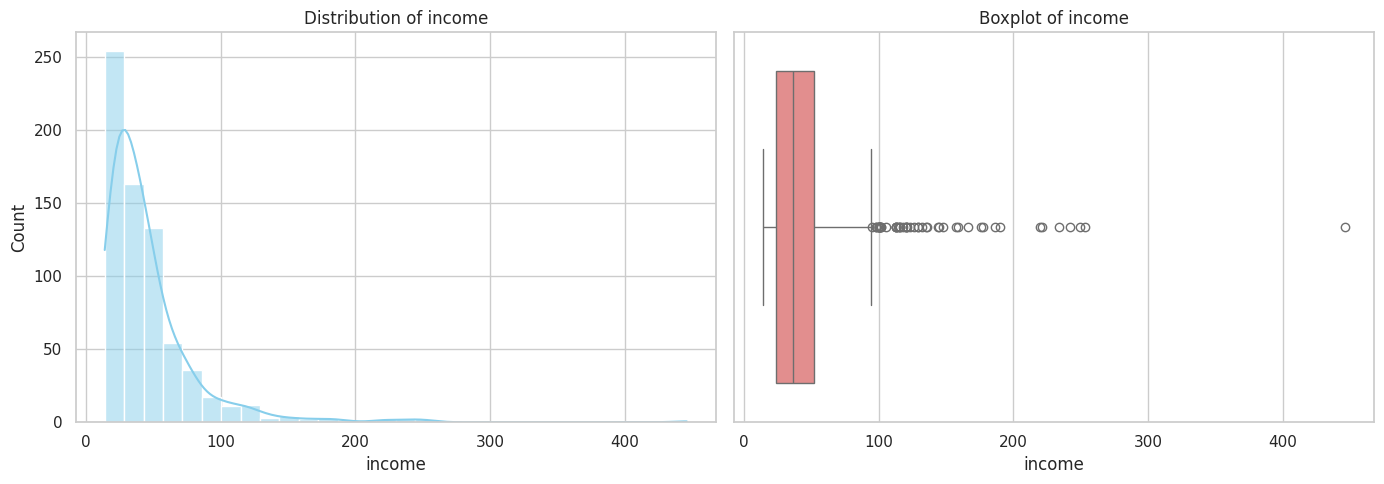

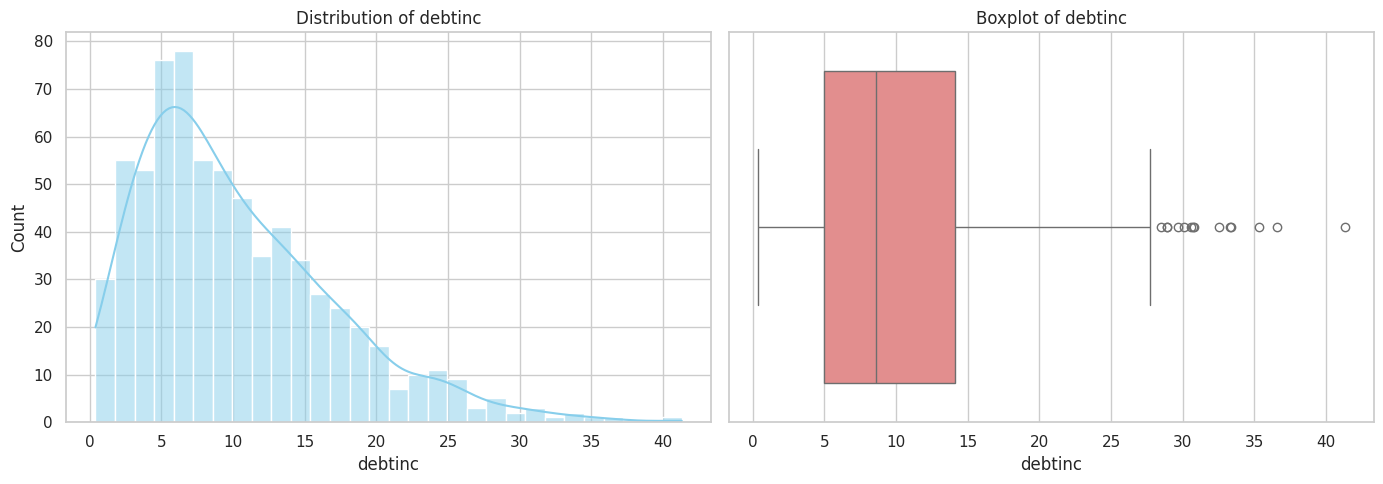

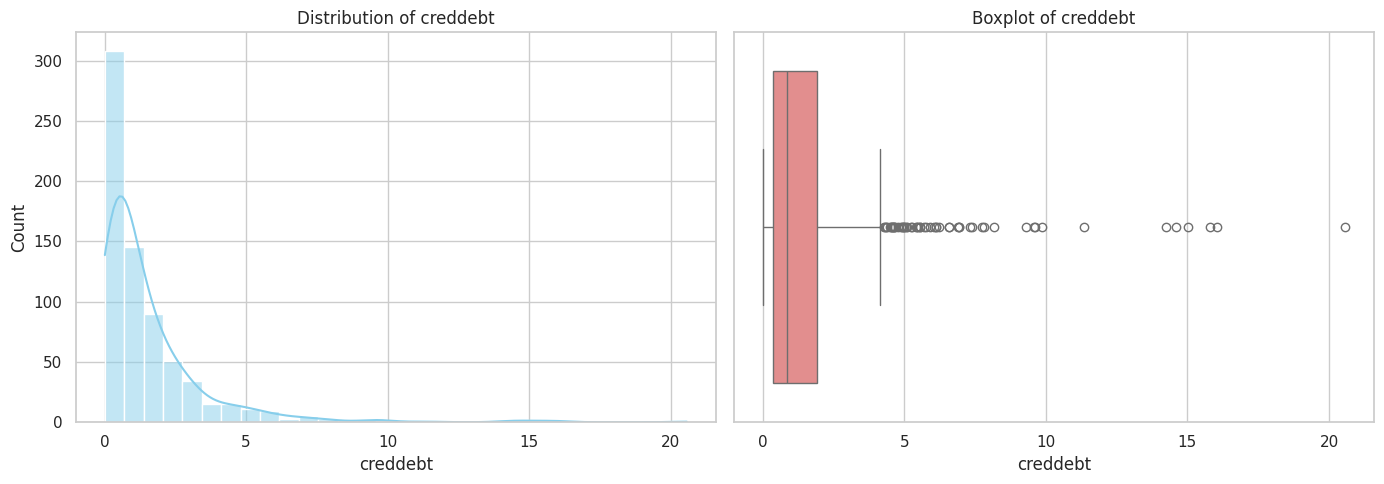

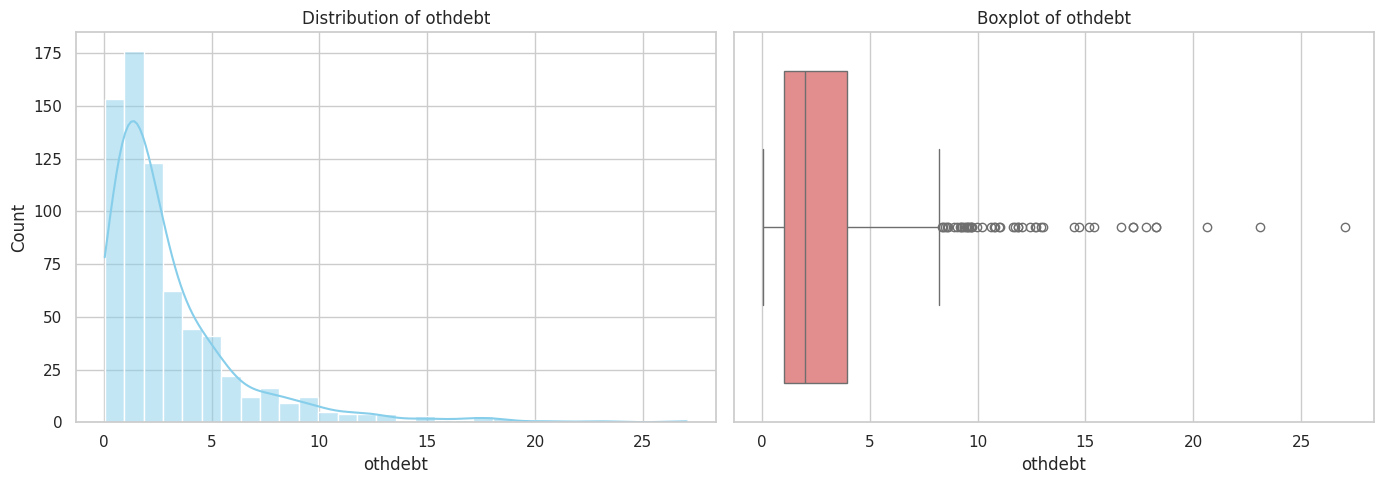

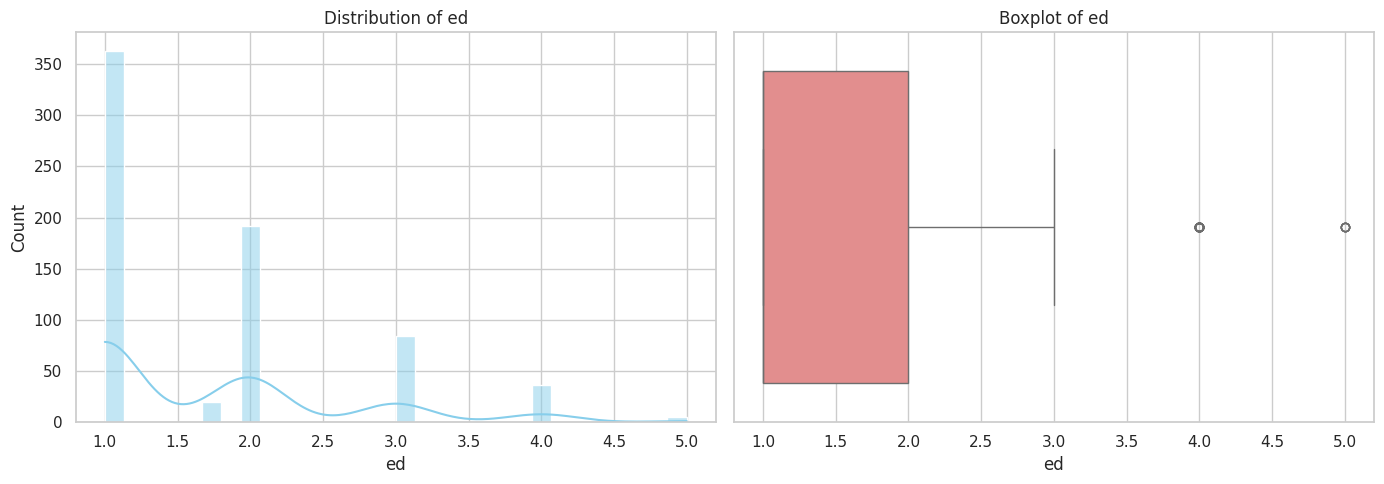

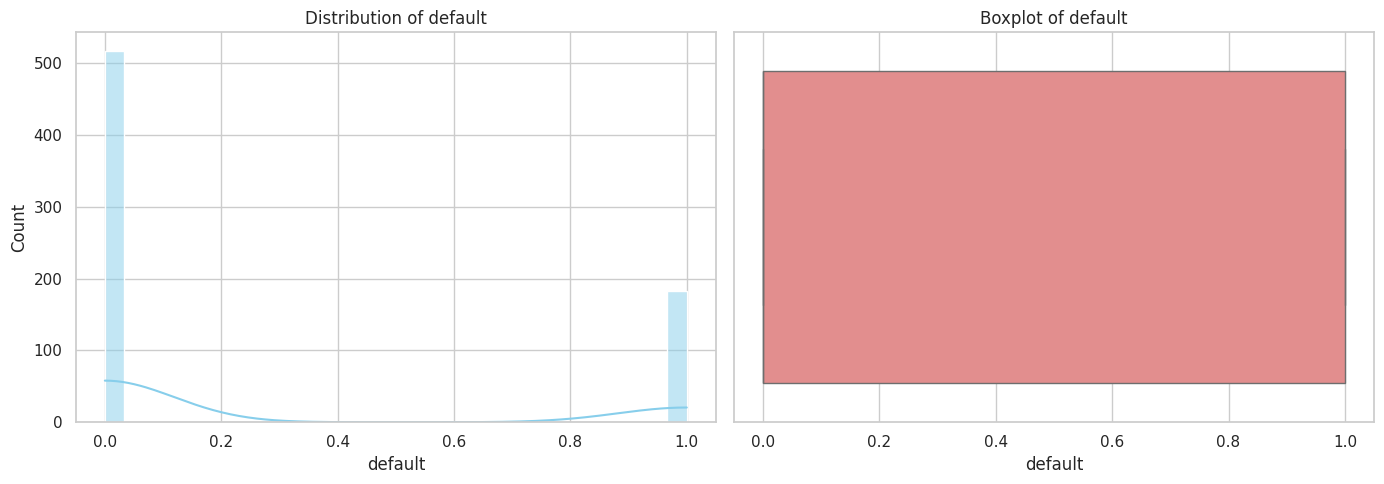

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Numerical columns
numerical_cols = ['age', 'employ', 'address','income','debtinc','creddebt','othdebt','ed','default']

# Loop through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_copy[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_copy[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# **Handle Outliers**

In [ ]:
#Detect Outliers (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

numerical_cols = ['age', 'employ', 'address','income','debtinc','creddebt','othdebt','ed','default']
# Detect outliers in the numerical_cols

for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

# Remove outliers in 'purchases'
Q1 = df_copy['employ'].quantile(0.25)
Q3 = df_copy['employ'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_copy = df_copy[(df_copy['employ'] >= lower) & (df_copy['employ'] <= upper)]


#Winsorize: cap values at 5th and 95th percentiles

# age :
lower_cap = df_copy['age'].quantile(0.05)
upper_cap = df_copy['age'].quantile(0.95)
df_copy['age'] = np.where(df_copy['age'] < lower_cap, lower_cap, df_copy['age'])
df_copy['age'] = np.where(df_copy['age'] > upper_cap, upper_cap, df_copy['age'])

# address :
lower_cap_address = df_copy['address'].quantile(0.05)
upper_cap_address = df_copy['address'].quantile(0.95)
df_copy['address'] = np.where(df_copy['address'] < lower_cap_address, lower_cap_address, df_copy['address'])
df_copy['address'] = np.where(df_copy['address'] > upper_cap_address, upper_cap_address, df_copy['address'])

# income :
lower_cap_income = df_copy['income'].quantile(0.05)
upper_cap_income = df_copy['income'].quantile(0.95)
df_copy['income'] = np.where(df_copy['income'] < lower_cap_income, lower_cap_income, df_copy['income'])
df_copy['income'] = np.where(df_copy['income'] > upper_cap_income, upper_cap_income, df_copy['income'])

# debtinc :
debtinc_lower_cap = df_copy['debtinc'].quantile(0.05)
debtinc_upper_cap = df_copy['debtinc'].quantile(0.95)
df_copy['debtinc'] = np.where(df_copy['debtinc'] < debtinc_lower_cap, debtinc_lower_cap, df_copy['debtinc'])
df_copy['debtinc'] = np.where(df_copy['debtinc'] > debtinc_upper_cap, debtinc_upper_cap, df_copy['debtinc'])

# creddebt :
lower_cap_creddebt = df_copy['creddebt'].quantile(0.05)
upper_cap_creddebt = df_copy['creddebt'].quantile(0.95)
df_copy['creddebt'] = np.where(df_copy['creddebt'] < lower_cap_creddebt, lower_cap_creddebt, df_copy['creddebt'])
df_copy['creddebt'] = np.where(df_copy['creddebt'] > upper_cap_creddebt, upper_cap_creddebt, df_copy['creddebt'])

# othdebt :
lower_cap_othdebt = df_copy['othdebt'].quantile(0.05)
upper_cap_othdebt = df_copy['othdebt'].quantile(0.95)
df_copy['othdebt'] = np.where(df_copy['othdebt'] < lower_cap_othdebt, lower_cap_othdebt, df_copy['othdebt'])
df_copy['othdebt'] = np.where(df_copy['othdebt'] > upper_cap_othdebt, upper_cap_othdebt, df_copy['othdebt'])

# ed :
lower_cap_ed = df_copy['ed'].quantile(0.05)
upper_cap_ed = df_copy['ed'].quantile(0.95)
df_copy['ed'] = np.where(df_copy['ed'] < lower_cap_ed, lower_cap_ed, df_copy['ed'])
df_copy['ed'] = np.where(df_copy['ed'] > upper_cap_ed, upper_cap_ed, df_copy['ed'])

# default :
lower_cap_default = df_copy['default'].quantile(0.05)
upper_cap_default = df_copy['default'].quantile(0.95)
df_copy['default'] = np.where(df_copy['default'] < lower_cap_default, lower_cap_default, df_copy['default'])
df_copy['default'] = np.where(df_copy['default'] > upper_cap_default, upper_cap_default, df_copy['default'])

print('--------------------------------------------')
for col in numerical_cols:
    outliers = detect_outliers_iqr(df_copy, col)
    print(f"Number of outliers in {col}: {len(outliers)}")






Number of outliers in age: 0
Number of outliers in employ: 10
Number of outliers in address: 14
Number of outliers in income: 52
Number of outliers in debtinc: 14
Number of outliers in creddebt: 55
Number of outliers in othdebt: 48
Number of outliers in ed: 41
Number of outliers in default: 0
--------------------------------------------
Number of outliers in age: 0
Number of outliers in employ: 0
Number of outliers in address: 0
Number of outliers in income: 44
Number of outliers in debtinc: 0
Number of outliers in creddebt: 51
Number of outliers in othdebt: 50
Number of outliers in ed: 41
Number of outliers in default: 0


<ipython-input-43-b7c24b5250fe>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['age'] = np.where(df_copy['age'] < lower_cap, lower_cap, df_copy['age'])
<ipython-input-43-b7c24b5250fe>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['age'] = np.where(df_copy['age'] > upper_cap, upper_cap, df_copy['age'])
<ipython-input-43-b7c24b5250fe>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S